# Automation of excel and email sending
I need to extract data from MS Excel documents, the data keeps changing in terms of the column names that's why i need to use AIn to identify the data columns that i need. and then, we need to have a graph generator to generate the graphs and also the grapghs generated should be compared to see when there is a decline or an improvement. and then i can also format an email, with a press of one button, i could send the email of the specified data directly.

In [1]:
import pandas as pd   # For data manipulation and analysis

In [2]:
data = pd.read_csv("Data/Customer Analysis.csv", low_memory=False)

In [3]:
data.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,phone_no.,place_name,county,city,state,zip,region,user_name,discount_percent
0,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01-10-2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01-10-2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13-11-2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
data = data.head(2000)

In [5]:
data.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'name_prefix', 'first_name', 'middle_initial', 'last_name', 'gender',
       'age', 'full_name', 'email', 'customer_since', 'SSN', 'phone_no. ',
       'place_name', 'county', 'city', 'state', 'zip', 'region', 'user_name',
       'discount_percent'],
      dtype='object')

In [6]:
# Data Cleaning
data = data.drop(columns = ['category','payment_method', 'bi_st','name_prefix', 'first_name', 'middle_initial', 'last_name', 'gender', 'age', 'SSN','place_name', 'city', 'state', 'zip', 'region', 'discount_percent'])
data = data.dropna()

In [7]:
# For SQL toolkit and ORM capabilities.
!pip install sqlalchemy

# For MySQL database connectivity.
!pip install mysql-connector-python

# For SQL magic command in IPython.
!pip install ipython-sql

import mysql.connector as connection  #For MySQL database connectivity.

import sqlite3  #For SQLite database connectivity.

In [8]:
# Establish a connection to a MySQL database using specified credentials.
mydb = connection.connect(host="127.0.0.1", user="root", passwd="anji2004", use_pure=True)

query = "CREATE DATABASE customer_analysis"  # SQL query to create a new database named 'customers_analysis'.

cursor = mydb.cursor()  # Create a cursor to execute SQL queries on the connected database.

cursor.execute(query)  # Execute the CREATE DATABASE query.

print(cursor.fetchall())  # Print the result of the query execution.

[]


In [9]:
cnn = sqlite3.connect('project.db')  # create a connection

In [10]:
data.to_sql('customers_orders',cnn)

2000

In [11]:
# Load the sql module to Python
%load_ext sql

In [12]:
%sql sqlite:///project.db

In [13]:
%%sql
SELECT * 
FROM customers_orders;

 * sqlite:///project.db
Done.


index,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,cust_id,year,month,ref_num,full_name,email,customer_since,phone_no.,county,user_name
0,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,60124,2020,Oct-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
1,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,60124,2020,Oct-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
2,100354680,01-10-2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,60124,2020,Oct-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
3,100354680,01-10-2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,60124,2020,Oct-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
4,100367357,13-11-2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,60124,2020,Nov-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
5,100367357,13-11-2020,received,595186,MEFBUY59B7C3DDC2CA3-42,2,39.9,39.9,0.0,39.9,60124,2020,Nov-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
6,100367360,13-11-2020,order_refunded,595192,MATDAN59C3C845B38F0,2,47.6,47.6,0.0,47.6,60124,2020,Nov-20,987867,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Harmon,jwtitus
7,100354677,01-10-2020,canceled,574769,GFE_19_USBLEDLight,2,49.0,49.0,0.0,49.0,42485,2020,Oct-20,171143,"Eaker, Lee",lee.eaker@gmail.com,02-04-1981,239-335-6755,Bradford,lseaker
8,100354677,01-10-2020,canceled,574770,oasis_Kingston-32GB-DTIG4,2,135.0,135.0,0.0,135.0,42485,2020,Oct-20,171143,"Eaker, Lee",lee.eaker@gmail.com,02-04-1981,239-335-6755,Bradford,lseaker
9,100354677,01-10-2020,canceled,574771,Geepas_GSB5420,2,549.9,549.9,0.0,549.9,42485,2020,Oct-20,171143,"Eaker, Lee",lee.eaker@gmail.com,02-04-1981,239-335-6755,Bradford,lseaker


In [14]:
%%sql
SELECT DISTINCT cust_id, email, user_name
FROM customers_orders;

 * sqlite:///project.db
Done.


cust_id,email,user_name
60124,jani.titus@gmail.com,jwtitus
42485,lee.eaker@gmail.com,lseaker
53620,jason.simoneau@gmail.com,jgsimoneau
56836,grover.bayless@yahoo.com,gxbayless
60125,albertina.bensen@gmail.com,aubensen
51286,drema.galle@gmail.com,dtgalle
60126,sheryll.newsome@gmail.com,sunewsome
60127,bernard.dewald@hotmail.co.uk,bkdewald
60128,hilario.brammer@hotmail.com,hwbrammer
56449,elizbeth.raminez@gmail.com,eeraminez


In [15]:
customer_id = int(input("Enter the Customer ID for whom you want to retrieve their sales record: "))

Enter the Customer ID for whom you want to retrieve their sales record: 15106


In [16]:
%%sql
SELECT * 
FROM customers_orders 
WHERE cust_id = :customer_id;

 * sqlite:///project.db
Done.


index,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,cust_id,year,month,ref_num,full_name,email,customer_since,phone_no.,county,user_name
159,100354698,01-10-2020,canceled,574809,Infinix_HotSmartX5010Black,2,959.9,959.9,0.0,959.9,15106,2020,Oct-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
160,100359540,25-10-2020,order_refunded,583210,AHM59C0C5DBB8E98,2,7.0,7.0,0.0,7.0,15106,2020,Oct-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
161,100361957,06-11-2020,order_refunded,587299,AHM59C0C5DBB8E98,2,7.0,7.0,0.0,7.0,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
162,100370311,21-11-2020,canceled,599485,OTHYAY59E0CBB78B39A,2,300.0,300.0,0.0,300.0,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
163,100370316,21-11-2020,canceled,599491,ENTECO59D4D8FDDD355,2,2812.5,2812.5,0.0,2812.5,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
164,100370598,21-11-2020,canceled,599812,ENTNOB59D5C80A40401,2,1690.0,1690.0,0.0,1690.0,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
165,100376828,13-12-2020,order_refunded,609943,WOFAEY59F9A2CD35852-36,2,119.9,119.9,0.0,119.9,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
166,100383230,20-12-2020,canceled,621322,WOFIMA59ACDFB589D23,2,140.0,140.0,14.0,126.0,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
167,100383230,20-12-2020,canceled,621323,WOFIMA59AD66C6F3CCF,2,125.0,125.0,12.5,112.5,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
168,100383242,20-12-2020,complete,621348,WOFIMA59AD66C6F3CCF,2,125.0,125.0,12.5,112.5,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount


In [17]:
%%sql
CREATE TABLE customer_table 
AS
SELECT *
FROM customers_orders
WHERE cust_id = :customer_id;

 * sqlite:///project.db
Done.


[]

In [18]:
%%sql
SELECT * 
FROM customer_table;

 * sqlite:///project.db
Done.


index,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,cust_id,year,month,ref_num,full_name,email,customer_since,phone_no.,county,user_name
159,100354698,01-10-2020,canceled,574809,Infinix_HotSmartX5010Black,2,959.9,959.9,0.0,959.9,15106,2020,Oct-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
160,100359540,25-10-2020,order_refunded,583210,AHM59C0C5DBB8E98,2,7.0,7.0,0.0,7.0,15106,2020,Oct-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
161,100361957,06-11-2020,order_refunded,587299,AHM59C0C5DBB8E98,2,7.0,7.0,0.0,7.0,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
162,100370311,21-11-2020,canceled,599485,OTHYAY59E0CBB78B39A,2,300.0,300.0,0.0,300.0,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
163,100370316,21-11-2020,canceled,599491,ENTECO59D4D8FDDD355,2,2812.5,2812.5,0.0,2812.5,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
164,100370598,21-11-2020,canceled,599812,ENTNOB59D5C80A40401,2,1690.0,1690.0,0.0,1690.0,15106,2020,Nov-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
165,100376828,13-12-2020,order_refunded,609943,WOFAEY59F9A2CD35852-36,2,119.9,119.9,0.0,119.9,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
166,100383230,20-12-2020,canceled,621322,WOFIMA59ACDFB589D23,2,140.0,140.0,14.0,126.0,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
167,100383230,20-12-2020,canceled,621323,WOFIMA59AD66C6F3CCF,2,125.0,125.0,12.5,112.5,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount
168,100383242,20-12-2020,complete,621348,WOFIMA59AD66C6F3CCF,2,125.0,125.0,12.5,112.5,15106,2020,Dec-20,503495,"Blount, Lenny",lenny.blount@apple.com,12/22/2005,228-450-0931,Sunflower,lxblount


In [19]:
result = %sql SELECT * FROM customer_table

 * sqlite:///project.db
Done.


In [20]:
new_data = result.DataFrame()

In [21]:
import matplotlib.pyplot as plt  # For data visualization.

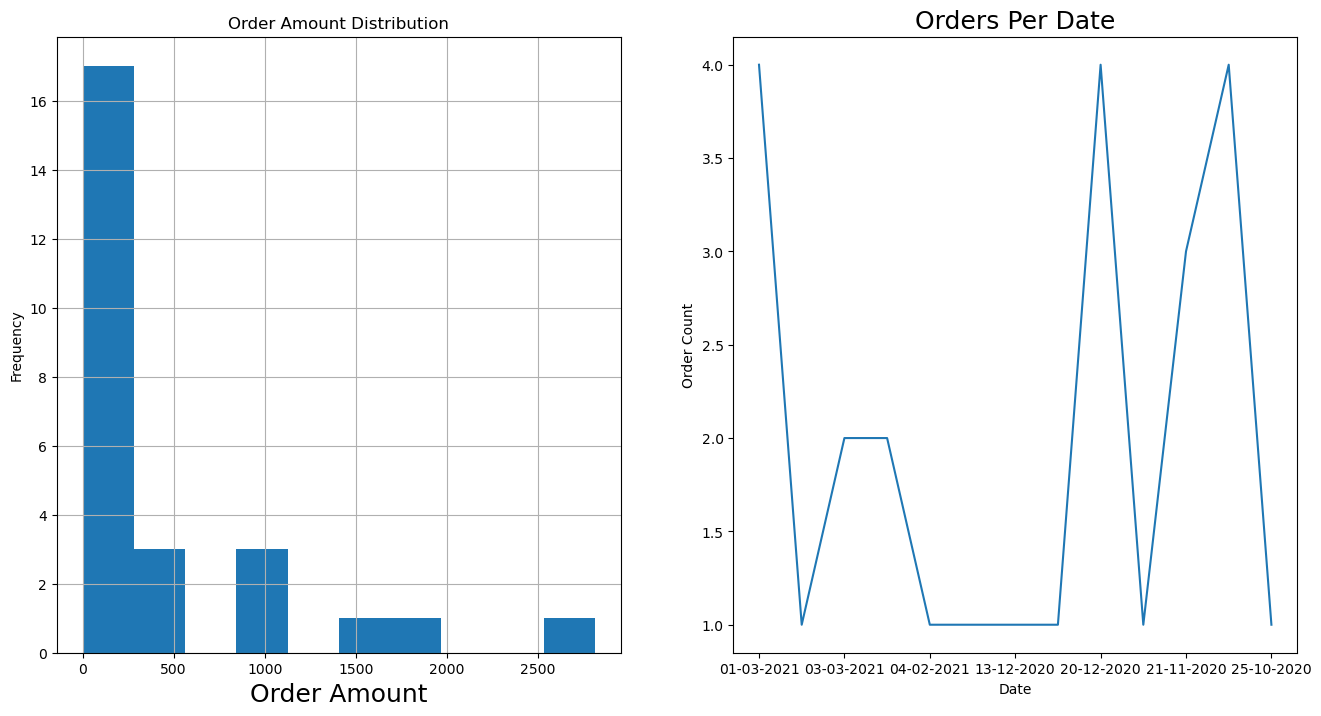

In [22]:
# Create a figure with a size of 16x8 inches.
plt.figure(figsize=(16, 8))

# Plot a histogram of order amounts
plt.subplot(121)  # left subplot. 
new_data['total'].hist()
plt.title('Order Amount Distribution')
plt.xlabel('Order Amount', size=18)
plt.ylabel('Frequency')

# Plot a line chart of orders over time.
plt.subplot(122)  # Right subplot
orders_by_date = new_data.groupby('order_date').size()
orders_by_date.plot(kind='line')
plt.title('Orders Per Date', size=18)
plt.xlabel('Date')
plt.ylabel('Order Count')


plt.savefig("Customer_Order_report.png")

plt.show()

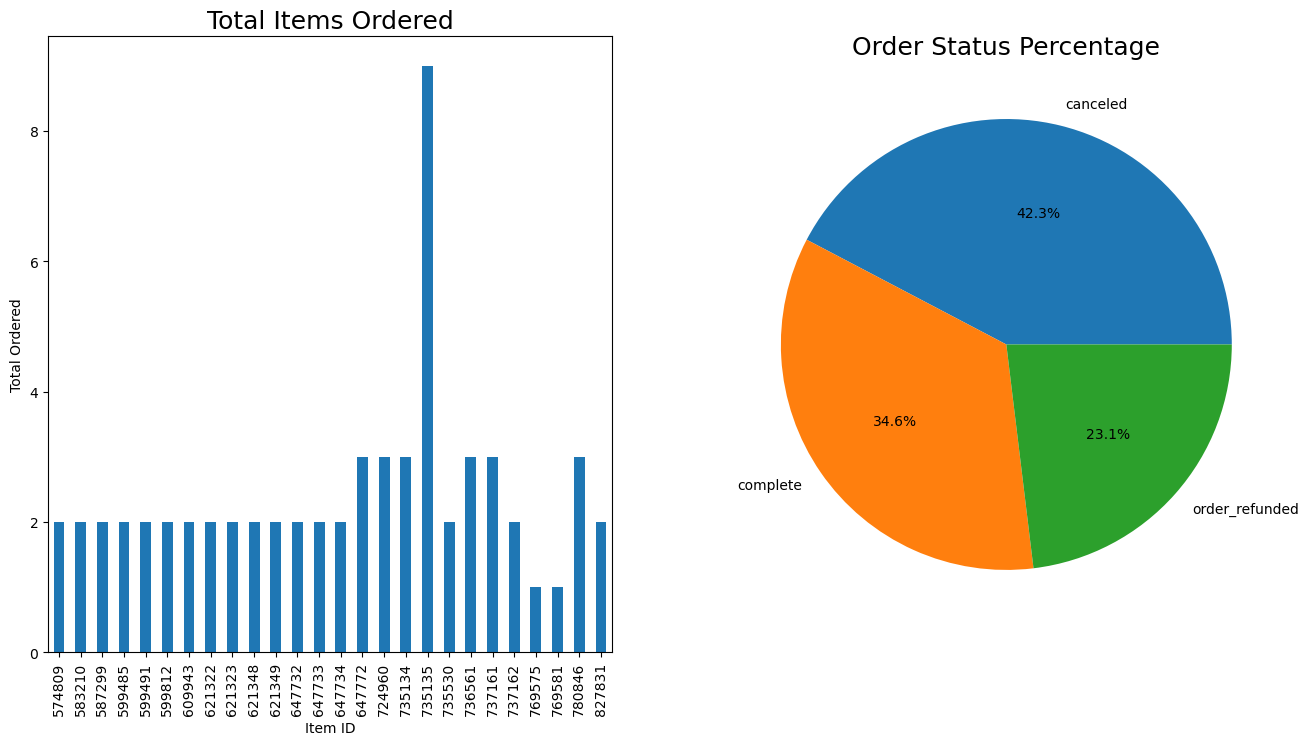

In [23]:
plt.figure(figsize=(16, 8))

# Plot a bar chart of total item quantities ordered.
plt.subplot(121)
item_qty = new_data.groupby('item_id')['qty_ordered'].sum()
item_qty.plot(kind='bar')
plt.title('Total Items Ordered', size=18)
plt.xlabel('Item ID')
plt.ylabel('Total Ordered')


# Create a pie chart of order status distribution in the right subplot.
order_status = new_data['status'].value_counts()  # Get the count of orders by status.
plt.subplot(122)
plt.pie(order_status, labels=order_status.index, autopct='%1.1f%%')
plt.title('Order Status Percentage', size=18)

plt.savefig("Customer_Order_status.png")

plt.show()

In [24]:
# Import classes for creating email components using MIME (Multipurpose Internet Mail Extensions).
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

import smtplib  # Import the 'smtplib' library for Simple Mail Transfer Protocol (SMTP) to send emails.

In [26]:
import Email
email_sender = Email.email
email_password = Email.password
email_receiver = "dexom13094@ebuthor.com"

In [27]:
subject = 'See your orders report'
body = "There are your orders report."

In [29]:
def send_email(receiver_email, subject, body, attachment_path1, attachment_path2):
    # Setup the MIME
    message = MIMEMultipart()
    message.attach(MIMEText(body, "plain"))

    # Attach the 1st graph
    with open(attachment_path1, "rb") as attachment:
        image = MIMEImage(attachment.read(), name="Order_report.png")
        message.attach(image)

    # Attach the 2nd graph
    with open(attachment_path2, "rb") as attachment:
        image = MIMEImage(attachment.read(), name="Order_status.png")
        message.attach(image)

    # Setup the parameters of the message
    message["From"] = email_sender
    message["To"] = receiver_email
    message["Subject"] = subject
    # Connect to the SMTP server and send the email
    with smtplib.SMTP("smtp.gmail.com", 587) as server:
        server.starttls()
        server.login(email_sender, email_password)
        server.sendmail(email_sender, email_receiver, message.as_string("Pay Your Money"))
              
send_email(email_receiver, subject, body, "Customer_Order_report.png", "Customer_Order_status.png")      